## Neural Networks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
!pip install keras

In [6]:
!pip install tensorflow

In [7]:
import keras 
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop,SGD
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

In [9]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [12]:
# Summarize dataset details
num_rows = df.shape[0]
num_columns =df.shape[1]
unique_classes = df['letter'].nunique() 

In [14]:
print(num_rows)
print(num_columns)
print(unique_classes)

20000
17
26


In [16]:
df.shape

(20000, 17)

In [18]:
df.size

340000

In [20]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [22]:
# Handling missing values

In [24]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [26]:
# no null values

In [28]:
# Normalization of data

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
features = df.drop(columns=['letter'])  # Replace 'target_column' with the actual target column name
target = df[['letter']]

In [34]:
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [36]:
target

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [38]:
scaler = StandardScaler()  

In [40]:
# Fit and transform the features
features1 = scaler.fit_transform(features)

In [42]:
features1

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [44]:
# Convert back to a DataFrame
features1_df = pd.DataFrame(features1, columns=features.columns)

In [46]:
features1_df

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.057698,-1.523844,-1.053277,-1.049137,-0.687476,0.050543,-0.215220,0.878329,0.344994,-0.917071,-0.172558,-1.888428,-0.448492,-0.219082,-0.269477,-0.495354
19996,1.555774,0.897117,1.428701,1.161947,0.225598,-1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,-0.448492,0.427463,-0.269477,-0.495354
19997,1.033079,0.594497,0.435910,0.719730,0.682135,-0.443044,1.504991,-0.603207,0.765028,1.092242,0.967691,-1.407789,-0.448492,2.367097,-0.659036,-2.350149
19998,-1.057698,-1.221224,-0.556881,-1.491354,-1.144013,0.544130,-0.215220,-0.973591,0.344994,0.690380,-0.172558,0.034125,-0.877220,0.427463,0.509640,0.122911


In [48]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [54]:
# Fit and transform labels to integers
target1 = label_encoder.fit_transform(target)
target1

array([19,  8,  3, ..., 19, 18,  0])

In [56]:
# Model Implementation

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(features1.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),                                         # Hidden layer with 32 neurons
    Dense(26, activation='softmax')                              # Output layer, 26 is the number of unique alphabet classes
])

In [62]:
# compile the model

In [64]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)

In [66]:
# Train the Model

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
# Split data into training and testing sets (e.g., 80% training and 20% testing)
x_train, x_test, y_train, y_test = train_test_split(features1, target1, test_size=0.2, random_state=42)

In [72]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2788 - loss: 2.5882 - val_accuracy: 0.6572 - val_loss: 1.2500
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6823 - loss: 1.1173 - val_accuracy: 0.7544 - val_loss: 0.8988
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7691 - loss: 0.8191 - val_accuracy: 0.7922 - val_loss: 0.7431
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8067 - loss: 0.6772 - val_accuracy: 0.8138 - val_loss: 0.6458
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.5720 - val_accuracy: 0.8325 - val_loss: 0.5797
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8430 - loss: 0.5314 - val_accuracy: 0.8484 - val_loss: 0.5209
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.4642 - val_accuracy: 0.8597 - val_loss: 0.4837
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8724 - loss: 0.4288 - val_accuracy

In [74]:
# Make Predictions on the Test Set

In [76]:
# Get predictions
y_pred = model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


In [78]:
y_pred

array([[1.04062042e-06, 1.50746127e-05, 7.17220871e-07, ...,
        1.80951178e-01, 4.37704966e-06, 6.87812865e-01],
       [1.13851231e-04, 1.77444192e-04, 3.66978836e-03, ...,
        1.03450275e-03, 2.48387718e-04, 6.39569998e-06],
       [9.99973416e-01, 4.70336443e-13, 1.12726695e-13, ...,
        4.49824678e-10, 3.67306749e-12, 7.75463377e-07],
       ...,
       [3.07284125e-07, 3.58384877e-10, 5.00975659e-07, ...,
        4.07729658e-06, 6.89186876e-08, 1.35132188e-06],
       [2.03649178e-02, 1.79428127e-06, 1.24655458e-07, ...,
        2.40036225e-05, 9.45791423e-01, 4.34989715e-03],
       [4.95102586e-06, 2.39756990e-16, 2.21737021e-11, ...,
        9.99885742e-06, 9.99883413e-01, 8.09346340e-11]], dtype=float32)

In [80]:
# Convert predictions to class labels
y_pred_classes = y_pred.argmax(axis=1)

In [82]:
y_pred_classes

array([25, 17,  0, ..., 16, 24, 24], dtype=int64)

In [84]:
# Evaluate the Model Performance

In [86]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9144 - loss: 0.2695
Test Accuracy: 0.9179999828338623


In [88]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       149
           1       0.90      0.86      0.88       153
           2       0.97      0.86      0.91       137
           3       0.90      0.90      0.90       156
           4       0.90      0.94      0.92       141
           5       0.86      0.87      0.87       140
           6       0.87      0.93      0.90       160
           7       0.82      0.75      0.78       144
           8       0.97      0.88      0.92       146
           9       0.93      0.96      0.95       149
          10       0.88      0.88      0.88       130
          11       0.97      0.90      0.94       155
          12       0.95      0.95      0.95       168
          13       0.96      0.90      0.93       151
          14       0.88      0.95      0.92       145
          15       0.95      0.90      0.92       173
          16       0.98      0.93      0.95       166
          17       0.78    

In [92]:
# Hyperparameter Tuning

In [94]:
from tensorflow.keras.optimizers import Adam

In [96]:
hidden_layers_options = [1, 2, 3]  # Number of hidden layers
neurons_options = [32, 64, 128]  # Neurons per layer
activation_options = ['relu', 'tanh']  # Activation functions
learning_rate_options = [0.001, 0.01]  # Learning rates
# Track results
results = []

for layers in hidden_layers_options:
    for neurons in neurons_options:
        for activation in activation_options:
            for lr in learning_rate_options:
                # Build model based on current hyperparameters
                model = Sequential()
                model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
                
                # Add hidden layers
                for _ in range(layers - 1):
                    model.add(Dense(neurons, activation=activation))
                
                # Output layer
                model.add(Dense(26, activation='softmax'))
                
                # Compile model
                optimizer = Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                
                # Train model
                history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
                
                # Evaluate model
                test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
                
                # Record results
                results.append({
                    'layers': layers,
                    'neurons': neurons,
                    'activation': activation,
                    'learning_rate': lr,
                    'test_accuracy': test_accuracy
                })
                print(f"Layers: {layers}, Neurons: {neurons}, Activation: {activation}, LR: {lr}, Accuracy: {test_accuracy}")

Layers: 1, Neurons: 32, Activation: relu, LR: 0.001, Accuracy: 0.8222500085830688
Layers: 1, Neurons: 32, Activation: relu, LR: 0.01, Accuracy: 0.875
Layers: 1, Neurons: 32, Activation: tanh, LR: 0.001, Accuracy: 0.812250018119812
Layers: 1, Neurons: 32, Activation: tanh, LR: 0.01, Accuracy: 0.8777499794960022
Layers: 1, Neurons: 64, Activation: relu, LR: 0.001, Accuracy: 0.8734999895095825
Layers: 1, Neurons: 64, Activation: relu, LR: 0.01, Accuracy: 0.9139999747276306
Layers: 1, Neurons: 64, Activation: tanh, LR: 0.001, Accuracy: 0.8427500128746033
Layers: 1, Neurons: 64, Activation: tanh, LR: 0.01, Accuracy: 0.921500027179718
Layers: 1, Neurons: 128, Activation: relu, LR: 0.001, Accuracy: 0.90625
Layers: 1, Neurons: 128, Activation: relu, LR: 0.01, Accuracy: 0.934499979019165
Layers: 1, Neurons: 128, Activation: tanh, LR: 0.001, Accuracy: 0.8632500171661377
Layers: 1, Neurons: 128, Activation: tanh, LR: 0.01, Accuracy: 0.9390000104904175
Layers: 2, Neurons: 32, Activation: relu, LR:

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
def build_model(neurons=32, layers=1, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    
    # Add hidden layers
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    
    # Output layer
    model.add(Dense(26, activation='softmax'))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV

In [104]:
# Define a function to build the model
def build_model(neurons=32, layers=1, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    
    # Add hidden layers
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    
    # Output layer
    model.add(Dense(26, activation='softmax'))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Define the hyperparameter grid
param_grid = {
    'neurons': [32, 64, 128],
    'layers': [1, 2, 3],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Manually iterate over the hyperparameter grid
best_accuracy = 0
best_params = {}

for neurons in param_grid['neurons']:
    for layers in param_grid['layers']:
        for activation in param_grid['activation']:
            for lr in param_grid['learning_rate']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        model = build_model(neurons=neurons, layers=layers, activation=activation, learning_rate=lr)
                        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
                        
                        # Evaluate the model
                        test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
                        
                        # Track the best model
                        if test_accuracy > best_accuracy:
                            best_accuracy = test_accuracy
                            best_params = {
                                'neurons': neurons,
                                'layers': layers,
                                'activation': activation,
                                'learning_rate': lr,
                                'batch_size': batch_size,
                                'epochs': epochs
                            }

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'neurons': 128, 'layers': 3, 'activation': 'tanh', 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}
Best Accuracy: 0.9617499709129333


In [106]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [108]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

In [112]:
accuracy

0.918

In [114]:
# Generate classification report
report = classification_report(y_test, y_pred_classes)

In [118]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       149
           1       0.90      0.86      0.88       153
           2       0.97      0.86      0.91       137
           3       0.90      0.90      0.90       156
           4       0.90      0.94      0.92       141
           5       0.86      0.87      0.87       140
           6       0.87      0.93      0.90       160
           7       0.82      0.75      0.78       144
           8       0.97      0.88      0.92       146
           9       0.93      0.96      0.95       149
          10       0.88      0.88      0.88       130
          11       0.97      0.90      0.94       155
          12       0.95      0.95      0.95       168
          13       0.96      0.90      0.93       151
          14       0.88      0.95      0.92       145
          15       0.95      0.90      0.92       173
          16       0.98      0.93      0.95       166
          17       0.78    

In [130]:
import seaborn as sns

In [132]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

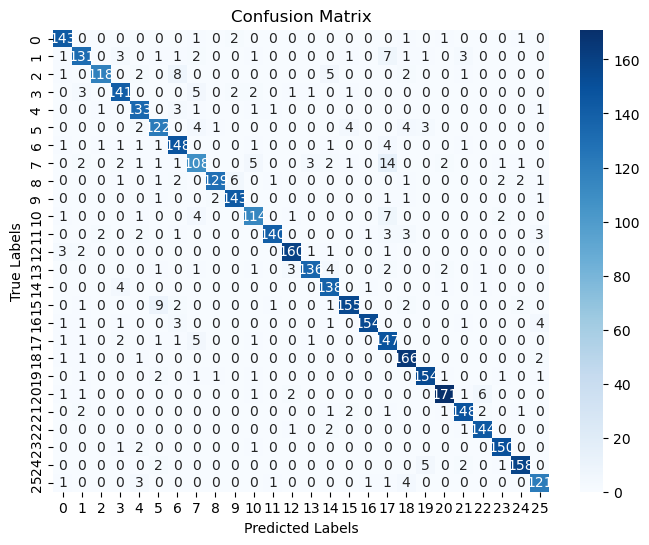

In [134]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(26), yticklabels=np.arange(26))

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [ ]:
# Hyperparameter tuning generally leads to a more robust model that performs better on both the training and test sets.